In [139]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./data/stack-overflow-developer-survey-2023/survey_results_public.csv")

In [140]:
df = df[['Country',
         'EdLevel',
         'YearsCodePro',
         'Employment',
         'ConvertedCompYearly']]

In [141]:
df = df.rename({'ConvertedCompYearly': 'Salary'}, axis=1)

In [142]:
df.dtypes

Country          object
EdLevel          object
YearsCodePro     object
Employment       object
Salary          float64
dtype: object

In [143]:
df = df[df['Salary'].notnull()]

In [144]:
df = df.dropna()

In [145]:
df

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0
...,...,...,...,...,...
89162,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24,"Employed, full-time",50719.0
89166,Armenia,Some college/university study without earning ...,2,"Employed, full-time;Independent contractor, fr...",16917.0
89167,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",15752.0
89170,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Employed, full-time",64254.0


In [146]:
df = df[df['Employment'] == 'Employed, full-time']
df = df.drop('Employment', axis=1)

In [147]:
def shorten_categories(categories, cutoff):
    cat_map = {}
    for c in range(len(categories)):
        if categories.values[c] >= cutoff:
            cat_map[categories.index[c]] = categories.index[c]
        else:
            cat_map[categories.index[c]] = 'Other'
    return cat_map


In [148]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                10569
Other                                                    9282
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440


<function matplotlib.pyplot.show(close=None, block=None)>

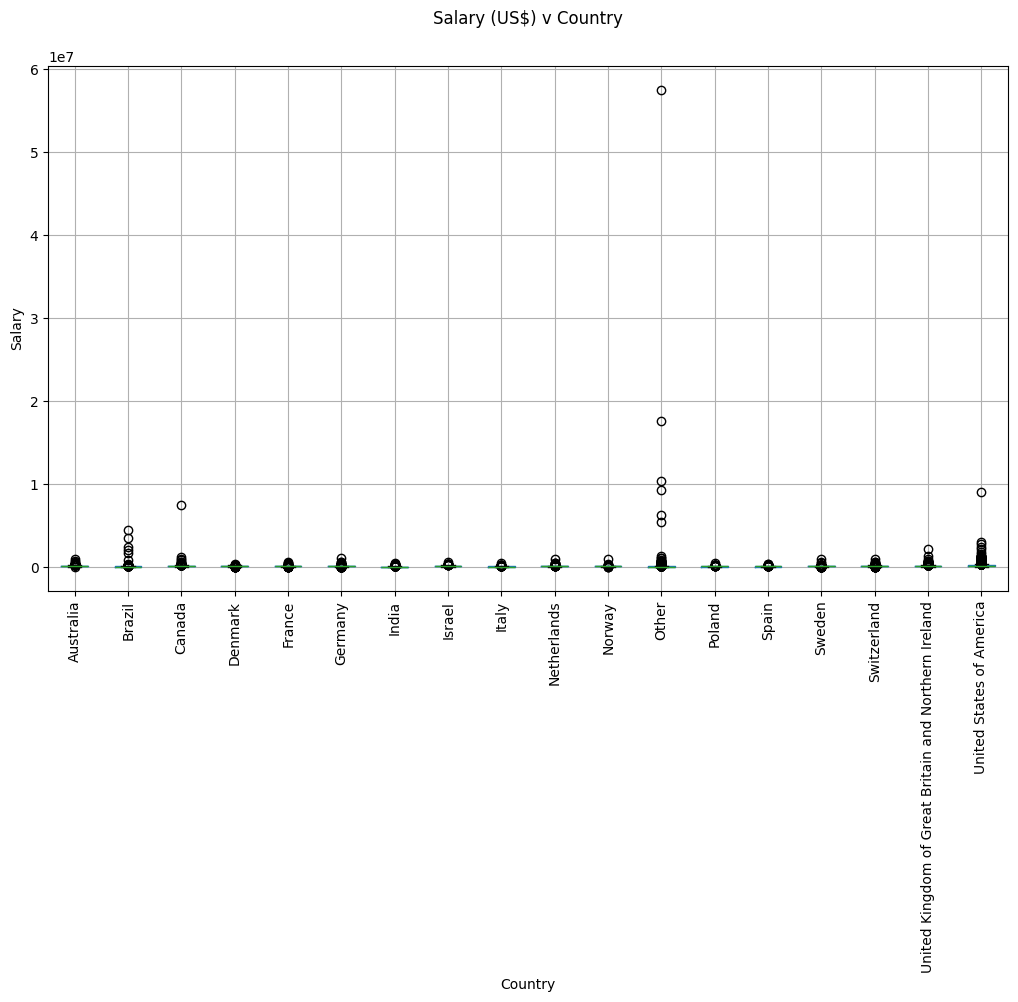

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show

In [150]:
df = df[df['Salary'] <= 250_000]
df = df[df['Salary'] >= 10_000]
df = df[df['Salary'] != 'Other']


In [151]:
df['YearsCodePro'].unique()

array(['23', '7', '21', '3', '15', '9', 'Less than 1 year', '10', '2',
       '6', '14', '5', '19', '13', '4', '16', '28', '11', '8', '24', '25',
       '12', '20', '18', '30', '27', '17', '43', '38', '33', '29', '22',
       '1', '40', '34', '42', '26', '31', '36', '39', '32', '44', '37',
       '35', '48', 'More than 50 years', '45', '41', '50', '46', '49',
       '47'], dtype=object)

In [152]:
def clean_expr(x):
    if x == 'More than 50 years':
        return 50
    elif x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_expr)

In [153]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [154]:
def clean_edu(x):
    if 'Bachelor’s degree' in x:
        return "Bachelor's degree"
    elif  'Master’s degree' in x:
        return "Master's degree"
    elif 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_edu)

In [155]:
df['EdLevel'].unique()

array(["Bachelor's degree", 'Less than a Bachelors', "Master's degree",
       'Post grad'], dtype=object)

In [156]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 1, 2, 3])

In [157]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([17, 16, 11,  0,  9,  5, 14,  4, 13,  1,  8,  2, 15,  6, 10,  3,  7,
       12])

In [158]:
x = df.drop('Salary', axis=1)
y = df['Salary']

In [159]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x, y.values)

LinearRegression()

In [160]:
y_pred = linear_reg.predict(x)

In [161]:
y_pred

array([137324.65209311, 106908.6049808 , 128105.95088908, ...,
        56941.58569535,  59415.21567702,  85163.76403519])

In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

error = np.sqrt(mean_squared_error(y, y_pred))

In [163]:
error

46486.32885147424

In [164]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x, y.values)

DecisionTreeRegressor(random_state=0)

In [165]:
y_pred = dec_tree_reg.predict(x)

In [166]:
error = np.sqrt(mean_squared_error(y, y_pred))

In [167]:
error

33118.00605186275

In [168]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(x, y.values)

RandomForestRegressor(random_state=0)

In [169]:
y_pred = random_forest_reg.predict(x)

In [170]:
error = np.sqrt(mean_squared_error(y, y_pred))


In [171]:
error

33174.69406906971

In [172]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {'max_depth': max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [173]:
regressor = gs.best_estimator_

regressor.fit(x, y.values)
y_pred = regressor.predict(x)
error = np.sqrt(mean_absolute_error(y, y_pred))



In [174]:
x

,Country,EdLevel,YearsCodePro
2,17,0,23.0
3,17,0,7.0
5,16,1,21.0
6,17,1,3.0
7,17,0,3.0
...,...,...,...
89160,11,3,5.0
89162,1,2,24.0
89167,6,0,2.0
89170,4,2,9.0


In [175]:
x = np.array([['United States of America', "Master's degree", 15]])

In [176]:
x

array([['United States of America', "Master's degree", '15']],
      dtype='<U24')

In [177]:
x[:, 0] = le_country.transform(x[:,0])
x[:, 1] = le_education.transform(x[:,1])
x = x.astype(float)
x

array([[17.,  2., 15.]])

In [178]:
y_pred = regressor.predict(x)
y_pred

/Users/radi/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([171952.90990991])

In [179]:
import pickle

In [183]:
data = {
    'model':regressor,
    'le_country': le_country,
    'le_education': le_education
}
with open('./data/steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [184]:
with open('./data/steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loades = data['model']
le_country = data['le_country']
le_education = data['le_education']


In [185]:
y_pred = regressor_loades.predict(x)
y_pred

/Users/radi/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([171952.90990991])